**Q1. Describe the decision tree classifier algorithm and how it works to make predictions.**

The Decision Tree is a supervised machine learning algorithm that can be used for classification and regression tasks. It can handle both categorical and continuous data respectively. The decision tree is similar to a tree-like data structure created starting from the root node and then branching out into leaves. All of this is constructed using input features, and it's essential to choose the best features. The data is split using different methods, and it's crucial to establish stopping criteria in machine learning. Two common methods for creating a decision tree are Gini impurity and information gain. Setting stop criteria is important to prevent overfitting, and typical stopping criteria include reaching a maximum depth.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset=load_iris()
print(dataset.DESCR)
dataset
df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
dataset.keys()

In [8]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X=df
y=dataset.target
X.shape,y.shape

((150, 4), (150,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**Q2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification.**

To answer this question, it is necessary to understand how the algorithm selects the best features and thresholds to split the data in order to minimize impurity. The step-by-step process encompasses these activities: measuring impurity, including Gini Impurity and entropy measuring, choosing the best split, selecting Splitting Criteria, which are different in classification and regression. This process continues recursively until it reaches a leaf node.


# Gini Impurity:
## Gini(D) = 1 - Σ(p_i)^2

# Entropy:
## H(D) = -Σ(p_i * log2(p_i))
# Splitting Criterion:
The decision tree algorithm selects the feature and its corresponding value that either minimizes the impurity of the child nodes or maximizes the information gain.
## Information Gain = Impurity(parent) - Σ(Weighted Impurity(child))
The weighted impurity of a child node is computed by multiplying its impurity by the fraction of data points it encompasses..
# Splitting Process:
The approach involves iteratively examining each feature and threshold to identify the feature-value pair that maximizes information gain. Subsequently, the data is partitioned into child nodes based on the selected feature and value.
# Leaf Nodes:
The decision tree's terminal nodes store the predicted class labels, which are identified when the splitting process terminates. Typically, the predicted class for classification is determined by examining the majority class within a terminal node.

In [27]:
from sklearn.tree import  DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred_0 = clf.predict(X_test)

In [31]:
clf1=DecisionTreeClassifier(criterion='entropy')
clf1.fit(X_train,y_train)
y_pred_1=clf1.predict(X_test)

In [32]:
clf2=DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf2.fit(X_train,y_train)
y_pred_2=clf2.predict(X_test)

**Q3. Explain how a decision tree classifier can be used to solve a binary classification problem.**

In [17]:
from sklearn import tree

A decision tree classifier can be used to solve binary classification problems, where the goal is to classify data into one of two possible classes or categories. In this case, we'll explore how to use a decision tree classifier for binary classification with Python using the scikit-learn library.



**Q4. Discuss the geometric intuition behind decision tree classification and how it can be used to make predictions.**

The geometric intuition behind decision tree classification involves dividing the feature space into regions or boundaries to separate different classes. This process is akin to drawing lines, where each decision node in the tree represents a decision boundary.

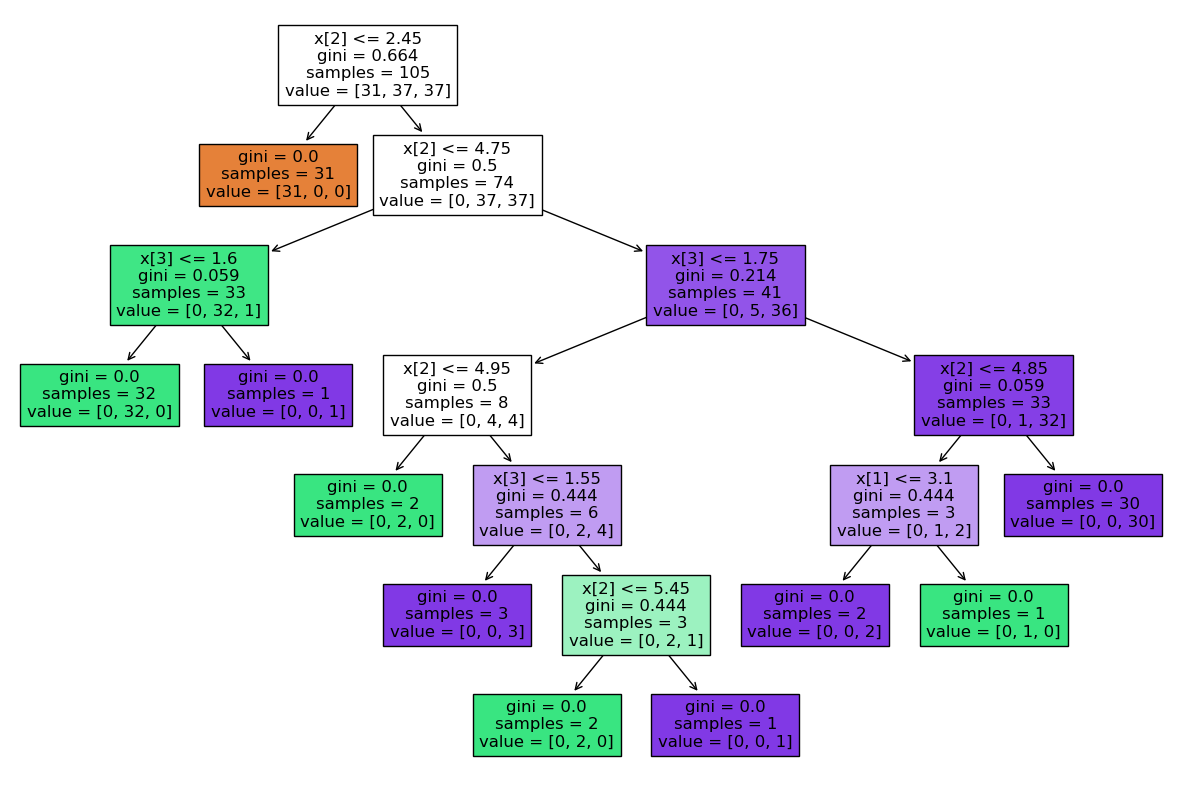

In [18]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf,filled=True);



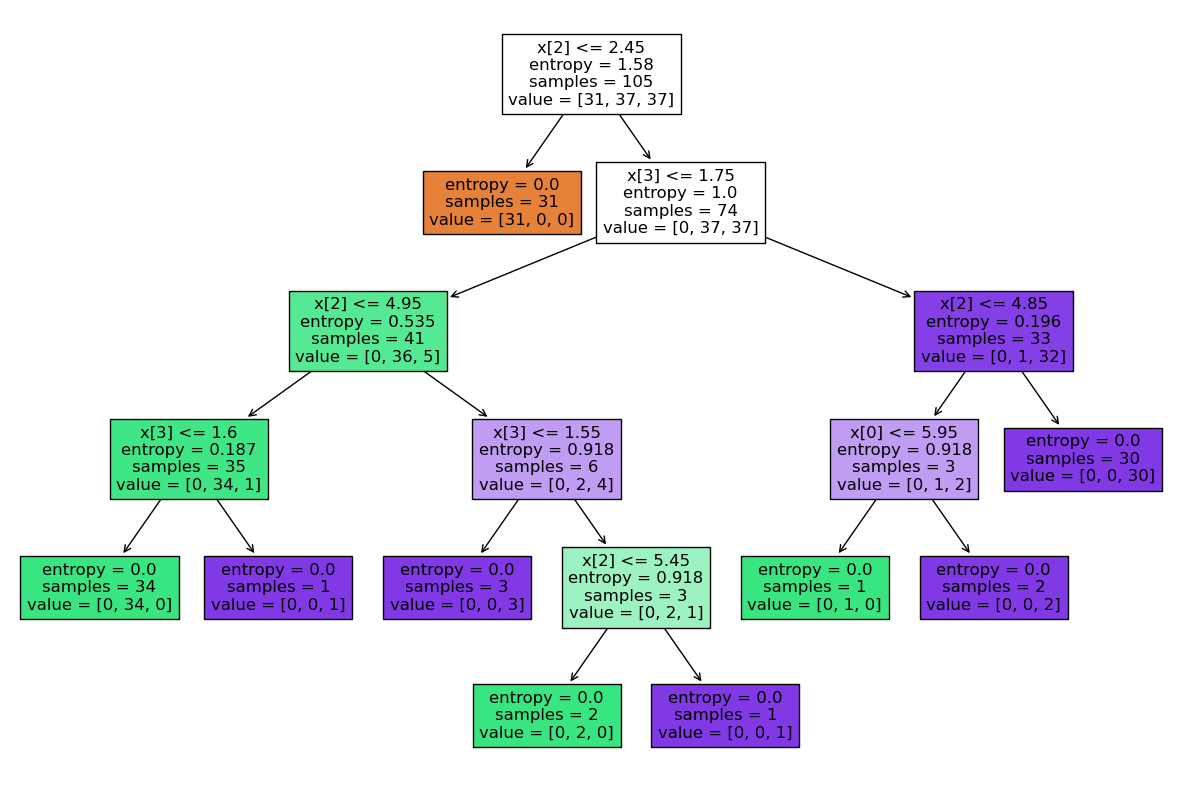

In [19]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf1,filled=True);

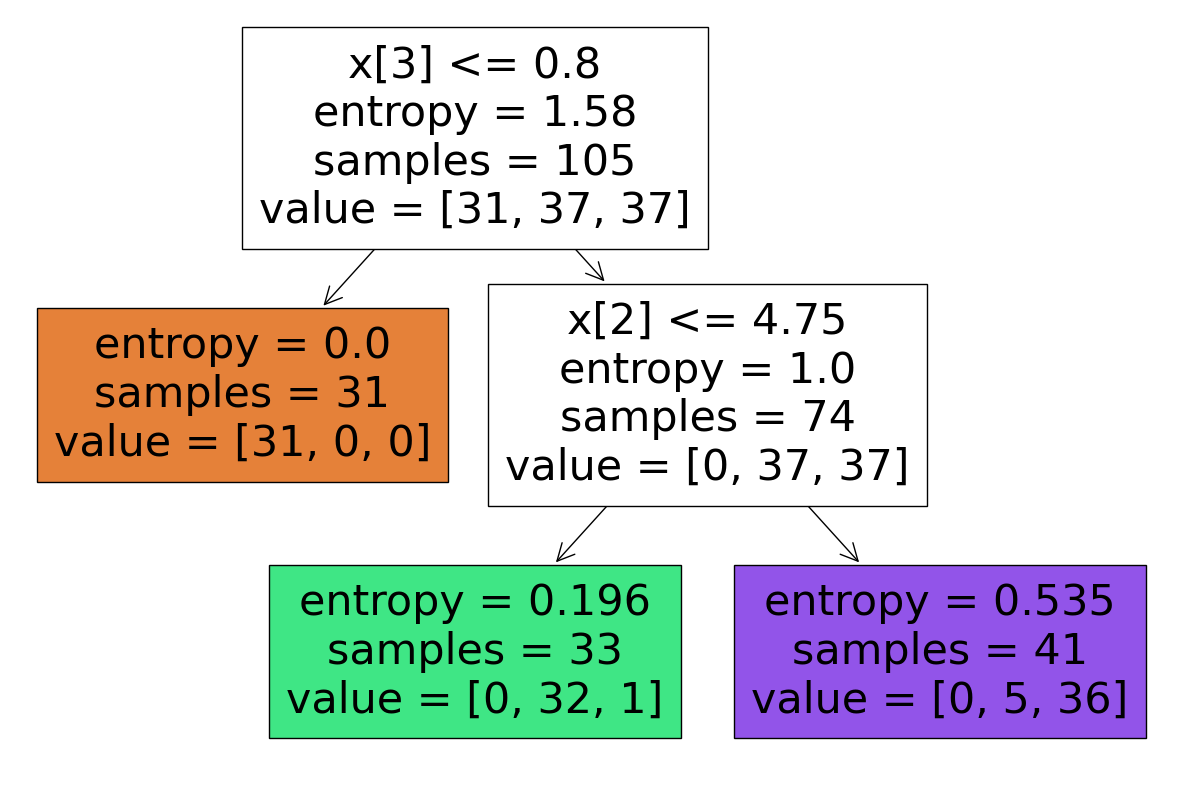

In [20]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf2,filled=True);

**Q5. Define the confusion matrix and describe how it can be used to evaluate the performance of a classification model.**

A confusion matrix is a tool used in the field of machine learning and statistics to assess the performance of a classification model, especially in binary and multi-class classification tasks. It provides a tabular representation of the model's predictions versus the actual class labels of the dataset. The confusion matrix is also known as an error matrix.
Here are the key components of a confusion matrix:
### True Positives (TP):
The number of instances that the model correctly predicted as the positive class.
### True Negatives (TN):
The number of instances that the model correctly predicted as the negative class.
### False Positives (FP):
The number of instances that the model incorrectly predicted as the positive class when they were actually negative (Type I error or false alarm).
### False Negatives (FN):
The number of instances that the model incorrectly predicted as the negative class when they were actually positive (Type II error or miss).


In [23]:
from sklearn.metrics import confusion_matrix, r2_score, classification_report,accuracy_score

**Q6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be calculated from it.**

In [29]:
print("The Confusion Matrix of first tree with Gini",confusion_matrix(y_test,y_pred_0))
print("r2_SCOR",r2_score(y_test,y_pred_0))
print(classification_report(y_test,y_pred_0))

The Confusion Matrix of first tree with Gini [[1]]
r2_SCOR nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [33]:
print("The Confusion Matrix of Second tree with Entropy",confusion_matrix(y_test,y_pred_1))
print("r2_SCOR",r2_score(y_test,y_pred_1))
print(classification_report(y_test,y_pred_1))

The Confusion Matrix of Second tree with Entropy [[1]]
r2_SCOR nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [34]:
print("The Confusion Matrix of Third tree with Entropy and depth define is two",confusion_matrix(y_test,y_pred_2))
print("r2_SCOR",r2_score(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))

The Confusion Matrix of Third tree with Entropy and depth define is two [[1]]
r2_SCOR nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**Q7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and explain how this can be done.**



## Accuracy:
Use it when the classes are balanced, and false positives and false negatives are equally important.
## Precision:
Use when you want to minimize false positives.
## Recall:
Use when you want to minimize false negatives.
## F1-score:
A balanced metric that considers both precision and recall.
## Area Under the Receiver Operating Characteristic (ROC-AUC):
Useful for binary classification with imbalanced classes.

In [37]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_0)
recall = recall_score(y_test, y_pred_0)
f1 = f1_score(y_test, y_pred_0)

print('Precision: {precision:.2f}')
print('Recall: {recall:.2f}')
print('F1-score: {f1:.2f}')

Precision: {precision:.2f}
Recall: {recall:.2f}
F1-score: {f1:.2f}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


**Q8. Provide an example of a classification problem where precision is the most important metric, and explain why.**

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np


np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf4 = DecisionTreeClassifier(random_state=42)
clf4.fit(X_train, y_train)
y_pred_4=clf4.predict(X_test)

clf5 = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf5.fit(X_train, y_train)
y_pred_5=clf5.predict(X_test)


print("The Confusion Matrix of fourth tree with gini",confusion_matrix(y_test,y_pred_4))
print("r2_SCOR",r2_score(y_test,y_pred_4))
print(classification_report(y_test,y_pred_4))

print("The Confusion Matrix of Fifth tree with entropy",confusion_matrix(y_test,y_pred_5))
print("r2_SCOR",r2_score(y_test,y_pred_5))
print(classification_report(y_test,y_pred_5))


The Confusion Matrix of fourth tree with gini [[10  0]
 [ 1  9]]
r2_SCOR 0.8
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

The Confusion Matrix of Fifth tree with entropy [[6 4]
 [1 9]]
r2_SCOR 0.0
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.69      0.90      0.78        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75      0.74        20



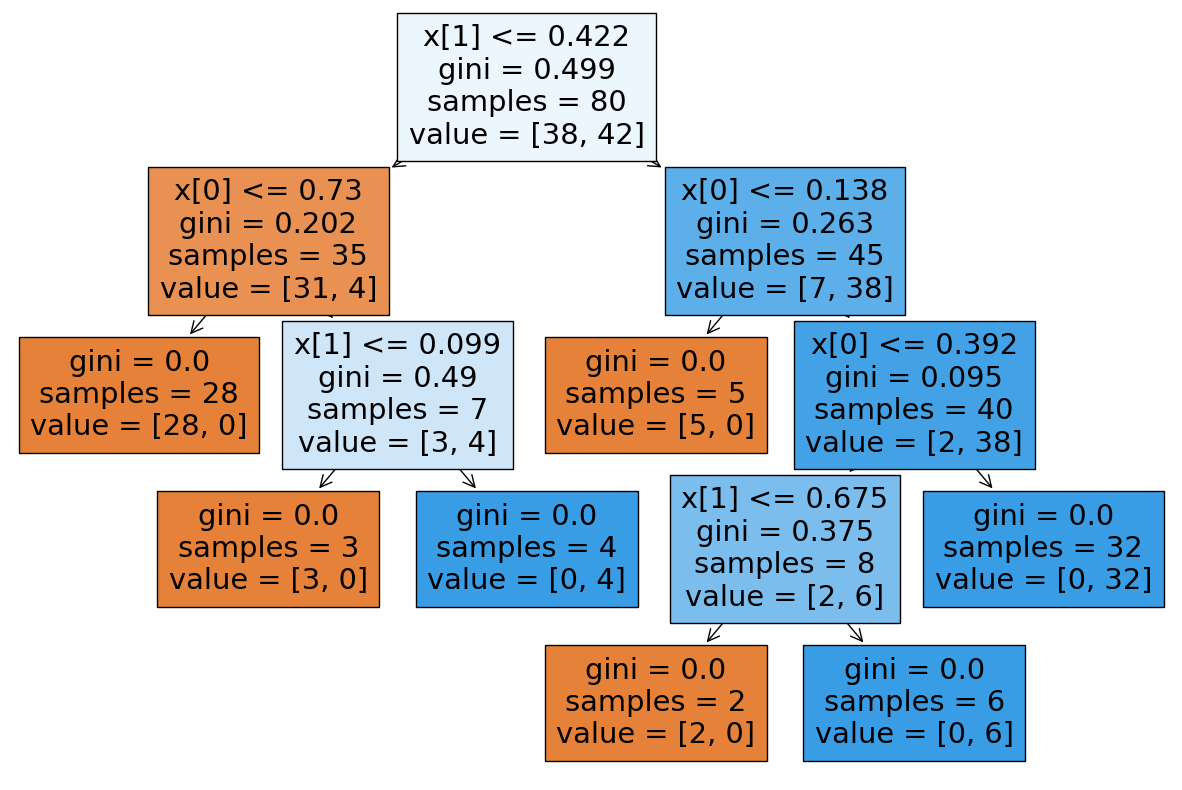

In [63]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf4,filled=True);

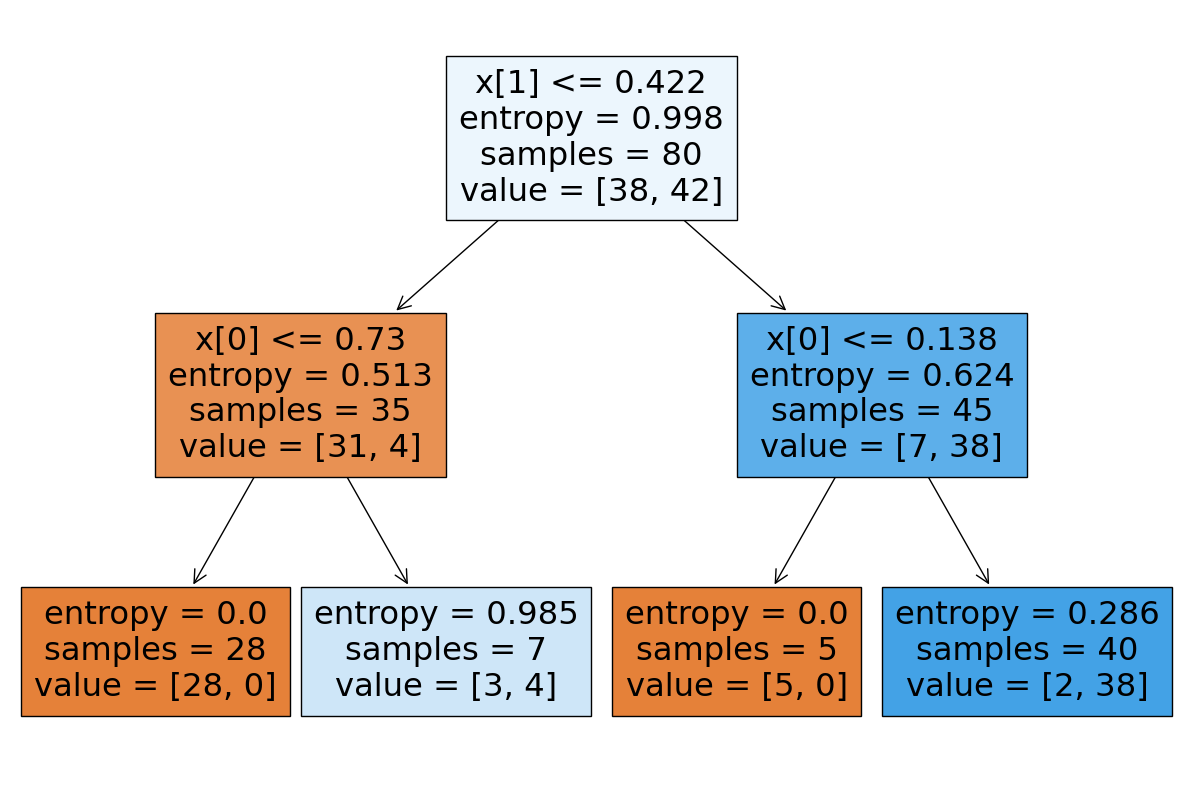

In [64]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf5,filled=True);

Using entropy with a decision tree of depth 2, the precision is higher than when compared to other models. Precision is a metric that measures the accuracy of the positive predictions made by the model and answers the question: 'Of all the instances predicted as positive by the model, how many were truly positive?' In the fourth tree, the precision is higher than in the fifth in this sample, while the R-squared (R2) score changes.

**Q9. Provide an example of a classification problem where recall is the most important metric and explain why.**

In [83]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1]* X[:, 1]> 1).astype(int)  # Binary target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf6 = DecisionTreeClassifier(random_state=42)
clf6.fit(X_train, y_train)
y_pred_6=clf6.predict(X_test)

clf7 = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf7.fit(X_train, y_train)
y_pred_7=clf7.predict(X_test)

recall = recall_score(y_test, y_pred_6)
print("Recall for sixth tree:", recall)
accuracy = accuracy_score(y_test, y_pred_6)
print("Accuracy for sixth tree:", accuracy)
classification_rep = classification_report(y_test, y_pred_6)
print(classification_rep)


recall = recall_score(y_test, y_pred_7)
print("Recall for seventh tree:", recall)
accuracy = accuracy_score(y_test, y_pred_7)
print("Accuracy for seventh tree:", accuracy)
classification_rep = classification_report(y_test, y_pred_7)
print(classification_rep)


Recall: 0.6666666666666666
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.67      0.67      0.67         6

    accuracy                           0.80        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.80      0.80      0.80        20

Recall: 0.16666666666666666
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.17      0.29         6

    accuracy                           0.75        20
   macro avg       0.87      0.58      0.57        20
weighted avg       0.82      0.75      0.68        20



# In this scenario where synthetic data is created, recall is more important because despite the higher accuracy of the sixth decision tree, recall is greater than the seventh.

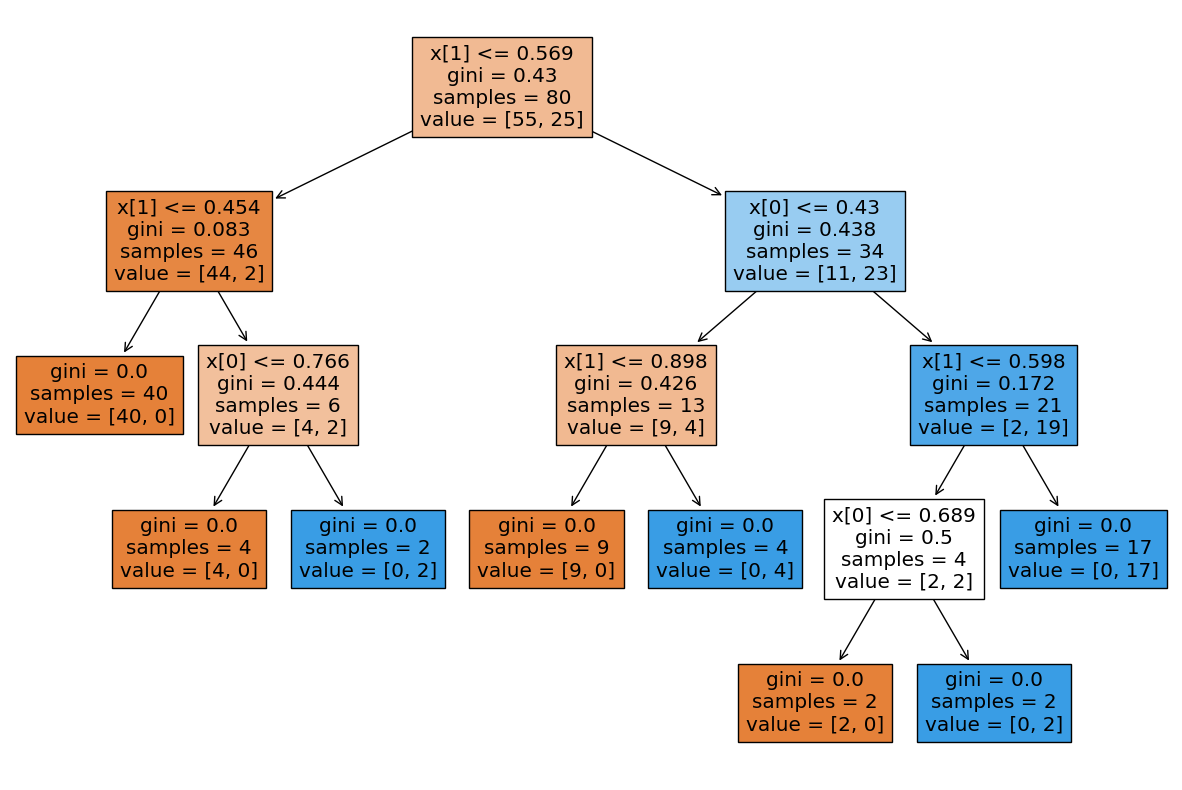

In [84]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf6,filled=True);

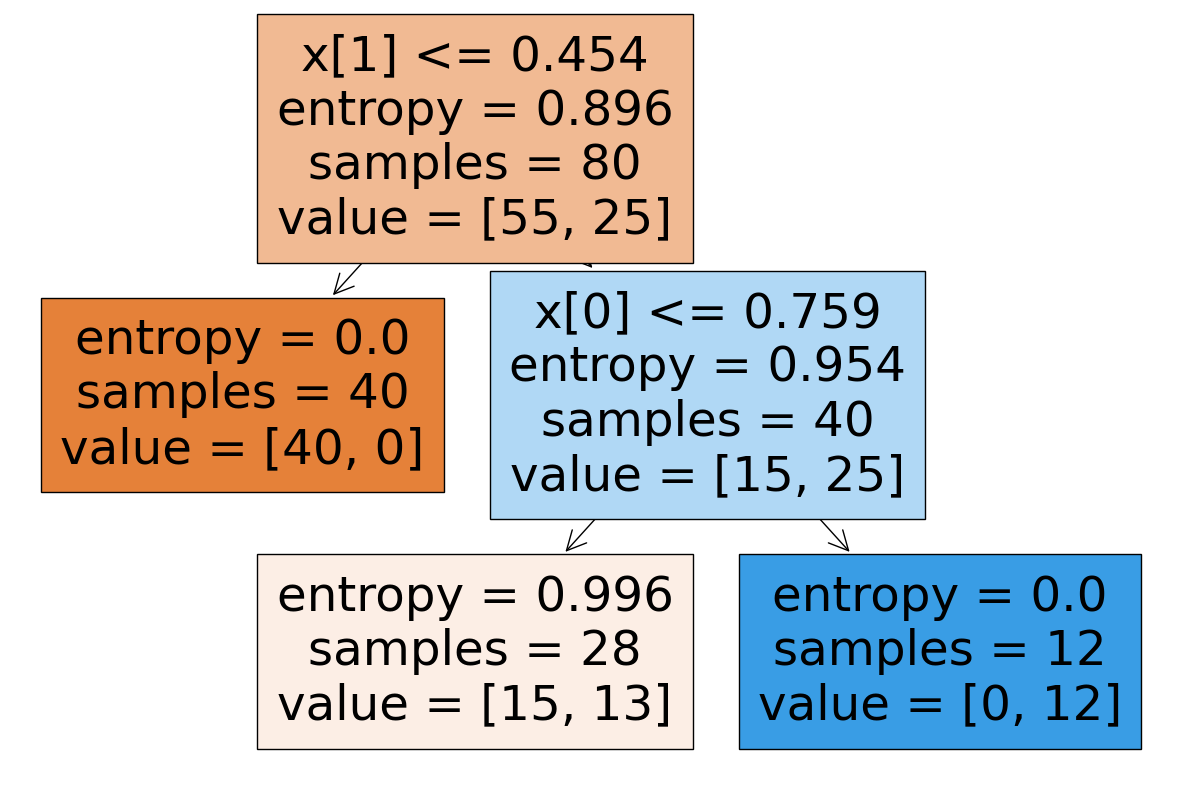

In [85]:
plt.figure(figsize=(15,10));
tree.plot_tree(clf7,filled=True);